In [79]:
#Imports below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Source
Covid-19 Data is collected from European Centre for Disease Prevention and Control

Link: https://www.ecdc.europa.eu/en/covid-19/data

In [3]:
# Download the data
file = 'https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv/data.csv'
df = pd.read_csv(file)

In [4]:
df.head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
0,Afghanistan,AFG,Asia,38928341,cases,0,2020-01,NaN,0,Epidemic intelligence national data
1,Afghanistan,AFG,Asia,38928341,cases,0,2020-02,0.0,0,Epidemic intelligence national data
2,Afghanistan,AFG,Asia,38928341,cases,0,2020-03,0.0,0,Epidemic intelligence national data
3,Afghanistan,AFG,Asia,38928341,cases,0,2020-04,0.0,0,Epidemic intelligence national data
4,Afghanistan,AFG,Asia,38928341,cases,0,2020-05,0.0,0,Epidemic intelligence national data


In [5]:
df.tail()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
42203,Zimbabwe,ZWE,Africa,14862927,deaths,2,2021-46,0.941941,4699,Epidemic intelligence national data
42204,Zimbabwe,ZWE,Africa,14862927,deaths,6,2021-47,0.538252,4705,Epidemic intelligence national data
42205,Zimbabwe,ZWE,Africa,14862927,deaths,5,2021-48,0.740096,4710,Epidemic intelligence national data
42206,Zimbabwe,ZWE,Africa,14862927,deaths,28,2021-49,2.220289,4738,Epidemic intelligence national data
42207,Zimbabwe,ZWE,Africa,14862927,deaths,49,2021-50,5.180675,4787,Epidemic intelligence national data


In [6]:
#Select subset of columns (Cases by date and country)
df = df[df['indicator'] == 'cases']
df = df[['country', 'year_week', 'weekly_count','population']]
df.head()

,country,year_week,weekly_count,population
0,Afghanistan,2020-01,0,38928341
1,Afghanistan,2020-02,0,38928341
2,Afghanistan,2020-03,0,38928341
3,Afghanistan,2020-04,0,38928341
4,Afghanistan,2020-05,0,38928341


In [81]:
#Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21104 entries, 0 to 42115
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       21104 non-null  string
 1   year_week     21104 non-null  string
 2   weekly_count  21104 non-null  int64 
 3   population    21104 non-null  int64 
dtypes: int64(2), string(2)
memory usage: 824.4 KB


In [8]:
#Convert columns, year_week and country as string
df['country'] = df['country'].astype('string')
df['year_week'] = df['year_week'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21104 entries, 0 to 42115
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       21104 non-null  string
 1   year_week     21104 non-null  string
 2   weekly_count  21104 non-null  int64 
 3   population    21104 non-null  int64 
dtypes: int64(2), string(2)
memory usage: 824.4 KB


# Nordic Countries
This is a map of the countries of interest.

![Nordic Countries](Nordic_countries.png)

Source: Wikimedia Commons, the free media repository


In [9]:
#Get the countries of interest
nordicCountries = ['Sweden', 'Denmark', 'Norway', 'Finland', 'Iceland']

#Grab those
df_nordic = df[df['country'].isin(nordicCountries)]

df_nordic

,country,year_week,weekly_count,population
10794,Denmark,2020-01,10,5822763
10795,Denmark,2020-02,13,5822763
10796,Denmark,2020-03,10,5822763
10797,Denmark,2020-04,15,5822763
10798,Denmark,2020-05,16,5822763
...,...,...,...,...
36923,Sweden,2021-47,11916,10327589
36924,Sweden,2021-48,13800,10327589
36925,Sweden,2021-49,18654,10327589
36926,Sweden,2021-50,24542,10327589


In [10]:
#Remove negative values and any nans
print('Total number of NaNs before cleanup:')
print(np.sum(df_nordic.isna()))
df_nordic = df_nordic[df_nordic['weekly_count'] >= 0]
df_nordic = df_nordic.dropna()
np.sum(df_nordic.isna())

Total number of NaNs before cleanup:
country         0
year_week       0
weekly_count    0
population      0
dtype: int64


country         0
year_week       0
weekly_count    0
population      0
dtype: int64

In [15]:
#Create cases per 100k population
df_nordic['weekly_cases_per_100k'] = 100000.0*df_nordic['weekly_count']/df_nordic['population']
df_nordic[df_nordic['country'] == 'Finland'].tail()

,country,year_week,weekly_count,population,weekly_cases_per_100k
14188,Finland,2021-46,7704,5525292,139.431545
14189,Finland,2021-47,7461,5525292,135.033587
14190,Finland,2021-48,8942,5525292,161.837601
14191,Finland,2021-49,9825,5525292,177.818656
14192,Finland,2021-50,12267,5525292,222.015416


In [12]:
df_nordic.columns

Index(['country', 'year_week', 'weekly_count', 'population',
       'weekly_cases_per_100k'],
      dtype='object')

In [59]:
#Let each contry have its own column
df_stats = df_nordic.pivot(index='year_week', columns='country', values='weekly_cases_per_100k')
df_stats.head()

country,Denmark,Finland,Iceland,Norway,Sweden
year_week,,,,,
2020-01,0.171740,0.000000,0.0,0.0,0.0
2020-02,0.223262,0.000000,0.0,0.0,0.0
2020-03,0.171740,0.000000,0.0,0.0,0.0
2020-04,0.257610,0.000000,0.0,0.0,0.0
2020-05,0.274784,0.018099,0.0,0.0,0.0


In [60]:
df_stats.tail()

country,Denmark,Finland,Iceland,Norway,Sweden
year_week,,,,,
2021-47,427.597689,135.033587,267.758572,343.860734,115.380269
2021-48,585.186105,161.837601,238.373785,495.362901,133.622668
2021-49,711.827014,177.818656,247.436383,635.984932,180.622990
2021-50,1280.388709,222.015416,371.291887,578.920109,237.635328
2021-51,1290.092006,NaN,911.477643,410.073068,271.651012


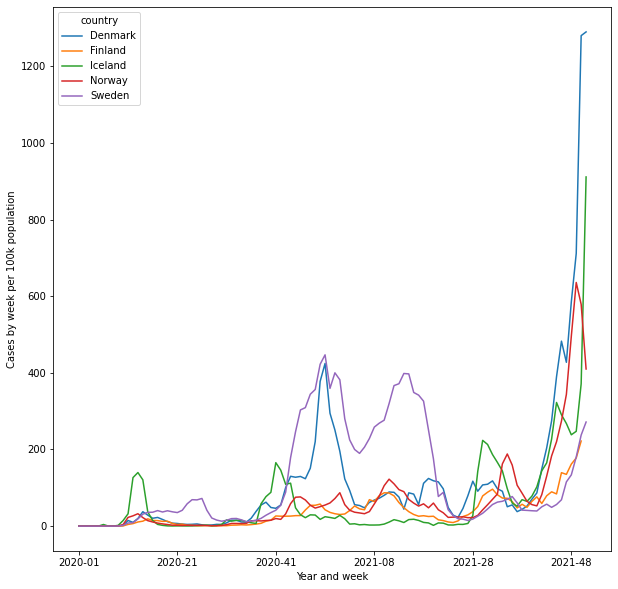

In [65]:
# Plot the cases by country over time
plot = df_stats.plot(figsize=(10,10))
plot.set_xlabel("Year and week");
plot.set_ylabel("Cases by week per 100k population");


# Are the number of Covid-19 cases about the same throughout the Nordic countries?

If we look at the plot above we can see that there are a lot of differences within the Nordic countries when it comes to the number of Covid-19 cases per 100k people, per week. 

Finland and Norway are similar. Iceland has had a relative low number of cases throughout 2020 with a few short peeks. During the end of 2021 it got a major outbreak though.

Sweden and Denmark has shapes that are more unique, which probably depends on the different political measures taken during this time.


# Is there any particular country that has a higher occurrance of Covid-19 cases per week?


If we view the plot above we can clearly see that Sweden has a much higher number of Covid-19 cases during the period 2020-41 to about 2021-20. After that period Sweden has instead a lower number of cases per week then the other Nordic countries.

Denmark has had a very high number of Covid-19 cases during the end of 2020 and again a very high peek at the end of 2021. No other contry comes as high as Denmark does during the end of 2021.

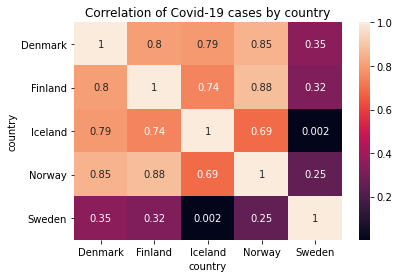

In [66]:
#Plot the heatmap of the correlation matrix
heatmap = sns.heatmap(df_stats.corr(), annot=True);
heatmap.set_title('Correlation of Covid-19 cases by country');

# What are the correlations between Covid-19 cases by country?

When we look at the correlation heatmap above we can see that most of the Nordic countries are highly correlated. The correlation coefficient is above about 0.7 for most country pairs.

One particular difference is however Sweden, that has a low correlation with the other Nordic contries. Even Iceland has a quite high correlation with the other Nordic countries, even though it is an isolated island.
